# UK Gov data for dwelling data

Tiffany Tran-Heinerich. 
Last update: 04/03/2024. 

Emrys Duclos. 
Last update: .

In [3]:
pip install odfpy

Note: you may need to restart the kernel to use updated packages.


In [118]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import math

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dwelling tenure by region

Data from the GOV UK.

In [220]:
file = "Data/GOV UK/Eng-dwelling_by-tenure-region.ods"
Dwe_tenure = pd.read_excel(file,sheet_name='109_(unrounded)').drop(index=[0,1])
Dwe_tenure.columns = Dwe_tenure.iloc[1]
Dwe_tenure.columns.name = None
Dwe_tenure = Dwe_tenure.drop(index=[3])
Dwe_tenure = Dwe_tenure.drop(index=np.arange(208,233))

print(Dwe_tenure.columns)
Dwe_tenure = Dwe_tenure.set_index("Country/Region")
Dwe_tenure = Dwe_tenure.loc[Dwe_tenure.index.notna(), Dwe_tenure.columns.notna()]

display(Dwe_tenure)

Index([          'Country/Region',                        nan,
                        'ENGLAND',               'North East',
                     'North West', 'Yorkshire and The Humber',
                  'East Midlands',            'West Midlands',
                'East of England',                   'London',
                     'South East',               'South West'],
      dtype='object')


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
ONS Code,E92000001,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009
Owner Occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,13230,..,..,..,..,..,..,..,..,..
1992,13388,..,..,..,..,..,..,..,..,..
1993,13493,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...
2018,24213.476671,1222.344099,3268.029935,2421.2492,2089.501617,2484.254178,2678.075351,3589.803113,3903.96296,2556.256218
2019,24461.242781,1231.763066,3297.683957,2441.5178,2113.001411,2508.720786,2708.264234,3631.227075,3945.807307,2583.257145
2020,24709.83389,1240.750033,3330.860978,2461.8144,2135.224206,2532.422393,2736.638117,3676.903038,3987.197653,2608.023073


Let's divide those in different tables, depending on the tenure. 

In [221]:
print(Dwe_tenure.index.to_list())

start_year = 1991
end_year = 2022

print(Dwe_tenure.index.to_list().index('Owner Occupied'))

tenure = 'Owner Occupied'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_owner_occupied = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_owner_occupied)

tenure = 'Rented Privately or with a job or business'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_private_or_business = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_private_or_business)

tenure = 'Rented from Private Registered Providers'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_providers = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_providers)

tenure = 'Rented from Local Authorities'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_local_authorities = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_local_authorities)

tenure = 'Other Public Sector Dwellings'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_public_sector = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_public_sector)

tenure = 'All Dwellings'
iloc_tenure = Dwe_tenure.index.to_list().index(tenure)
Dwe_total = Dwe_tenure.iloc[iloc_tenure:iloc_tenure+end_year-start_year+2,:]

display(Dwe_total)

['ONS Code', 'Owner Occupied', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'Rented Privately or with a job or business', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'Rented from Private Registered Providers', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'Rented from Local Authorities', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'Other Public Sector Dwellings', 1991, 1992, 1993, 1994, 1995, 1996, 1997, 199

,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
Owner Occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,13230,..,..,..,..,..,..,..,..,..
1992,13388,..,..,..,..,..,..,..,..,..
1993,13493,..,..,..,..,..,..,..,..,..
1994,13616,..,..,..,..,..,..,..,..,..
1995,13741,..,..,..,..,..,..,..,..,..
1996,13842,..,..,..,..,..,..,..,..,..
1997,13979,..,..,..,..,..,..,..,..,..
1998,14187,..,..,..,..,..,..,..,..,..


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
Rented Privately or with a job or business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,1767,59,189,170,134,143,191,369,299,212
1992,1806,58,192,172,136,144,192,385,307,220
1993,1867,61,195,174,138,146,195,411,319,227
1994,1929,71,204,180,137,156,202,428,325,227
1995,1998,78,217,192,137,167,205,439,332,230
1996,2073,76,231,199,145,169,209,454,347,244
1997,2125,74,238,203,152,166,212,467,362,251
1998,2121,77,236,203,150,161,208,470,367,248


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
Rented from Private Registered Providers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,608,35,115,46,28,57,54,148,88,36
1992,646,39,117,50,30,60,59,157,95,39
1993,714,41,121,53,35,66,67,177,109,45
1994,779,45,130,58,39,73,75,188,122,50
1995,857,45,136,60,43,87,88,192,146,60
1996,942,46,146,64,45,91,93,198,181,77
1997,985,47,153,66,48,101,97,204,186,84
1998,1040,48,159,69,50,114,100,219,196,85


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
Rented from Local Authorities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,3899,332,591,479,314,480,350,703,376,274
1992,3844,325,578,474,311,477,342,686,379,271
1993,3760,320,569,466,308,471,326,662,370,268
1994,3666,314,550,458,304,458,323,648,354,258
1995,3565,308,542,452,300,440,311,638,328,247
1996,3470,302,532,447,297,432,306,628,293,232
1997,3401,298,523,441,293,410,302,621,288,224
1998,3309,292,509,434,289,402,295,596,278,214


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
Other Public Sector Dwellings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,167,..,..,..,..,..,..,..,..,..
1992,151,..,..,..,..,..,..,..,..,..
1993,153,..,..,..,..,..,..,..,..,..
1994,150,..,..,..,..,..,..,..,..,..
1995,145,..,..,..,..,..,..,..,..,..
1996,141,..,..,..,..,..,..,..,..,..
1997,132,..,..,..,..,..,..,..,..,..
1998,121,..,..,..,..,..,..,..,..,..


,ENGLAND,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
Country/Region,,,,,,,,,,
All Dwellings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,19671,1072,2792,2021,1634,2079,2093,2912,3099,1968
1992,19836,1077,2806,2035,1651,2094,2116,2934,3131,1991
1993,19987,1082,2822,2048,1666,2110,2137,2953,3159,2010
1994,20139,1086,2838,2061,1682,2124,2159,2972,3189,2029
1995,20305,1091,2855,2076,1700,2141,2182,2990,3219,2051
1996,20468,1094,2874,2090,1717,2156,2205,3009,3250,2072
1997,20622,1100,2890,2105,1732,2170,2227,3026,3280,2093
1998,20778,1104,2905,2120,1748,2183,2249,3041,3310,2117


* `Dwe_owner_occupied` :
* `Dwe_private_or_business` :
* `Dwe_providers` :
* `Dwe_local_authorities` :
* `Dwe_public_sector` :
* `Dwe_total` :

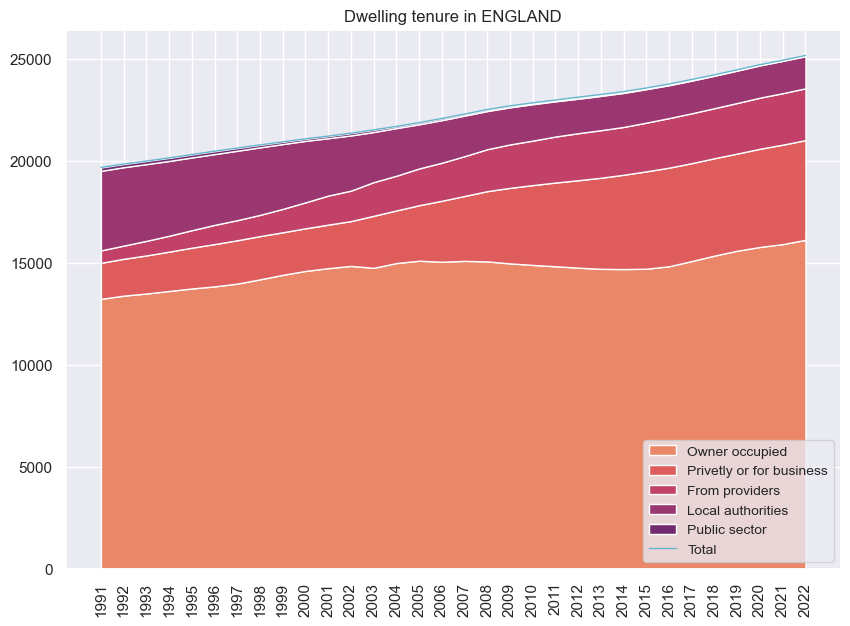

In [222]:
#Dwe_owner_occupied
#Dwe_private_or_business
#Dwe_providers
#Dwe_local_authorities
#Dwe_public_sector

def plot_tenure(begin, end, region, png):
    time = np.arange(begin,end+1)
    y_tenure = [
        Dwe_owner_occupied.loc[begin:end,region].to_list(),
        Dwe_private_or_business.loc[begin:end,region].to_list(),
        Dwe_providers.loc[begin:end,region].to_list(),
        Dwe_local_authorities.loc[begin:end,region].to_list(),
        Dwe_public_sector.loc[begin:end,region].to_list()
    ]
    y = Dwe_total.loc[begin:end,region].to_list()
    col = sns.color_palette("mako", 1)
    cols = sns.color_palette("flare", 5)
    plt.stackplot(time,y_tenure, labels=['Owner occupied','Privetly or for business','From providers','Local authorities','Public sector'], colors=cols)
    plt.plot(time,y,'c',label='Total',linewidth=1)
    plt.xticks(time, rotation=90)
    plt.legend(loc='lower right',fontsize='small')
    plt.title("Dwelling tenure in "+region)
    plt.savefig(png,dpi=300,bbox_inches="tight")
    plt.show()
    return 

plot_tenure(1991, 2022, "ENGLAND","Output/Dwe-Ten-Eng-1991-2022.png")


Plotting the evolution between 1991 and 2022 in the other regions. However, the data is available only from 2002 on. 

['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands', 'East of England', 'London', 'South East', 'South West']
9


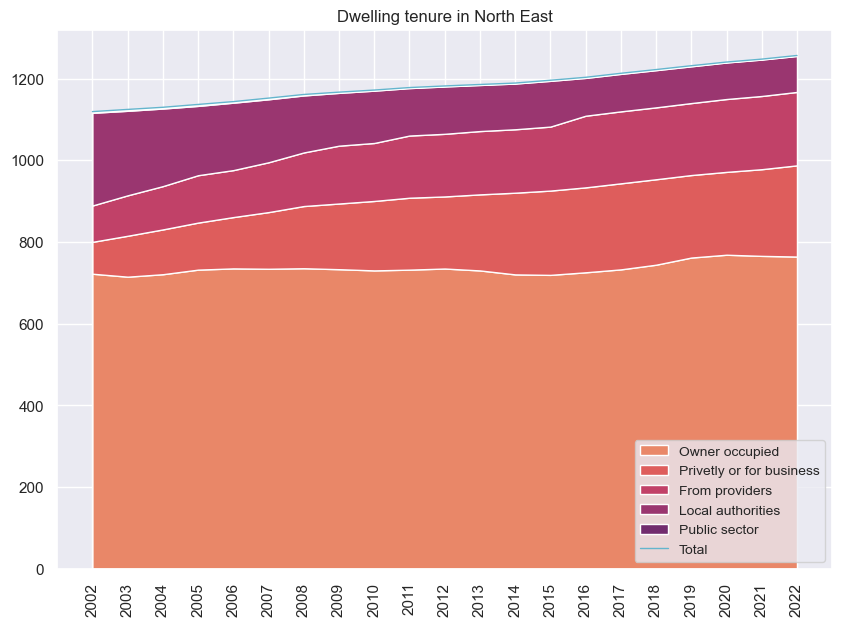

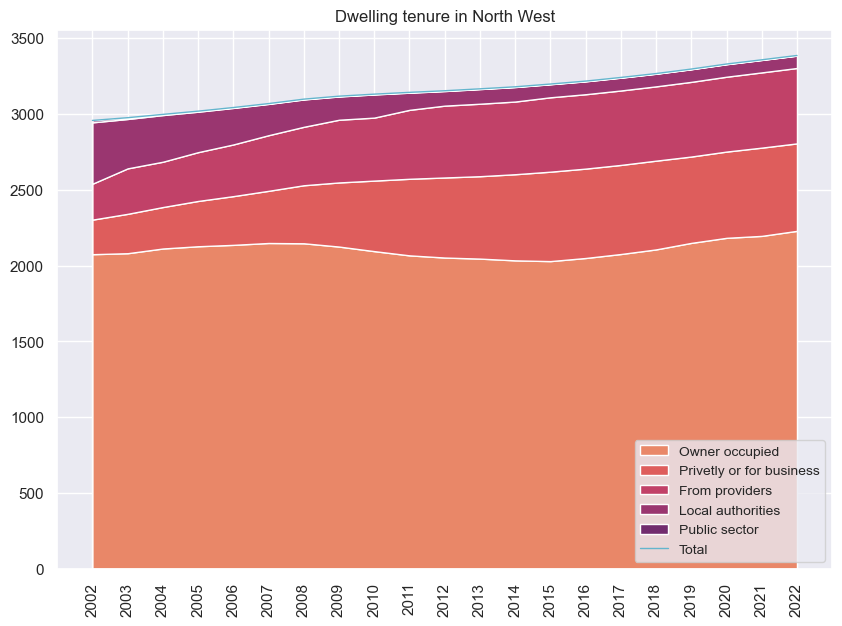

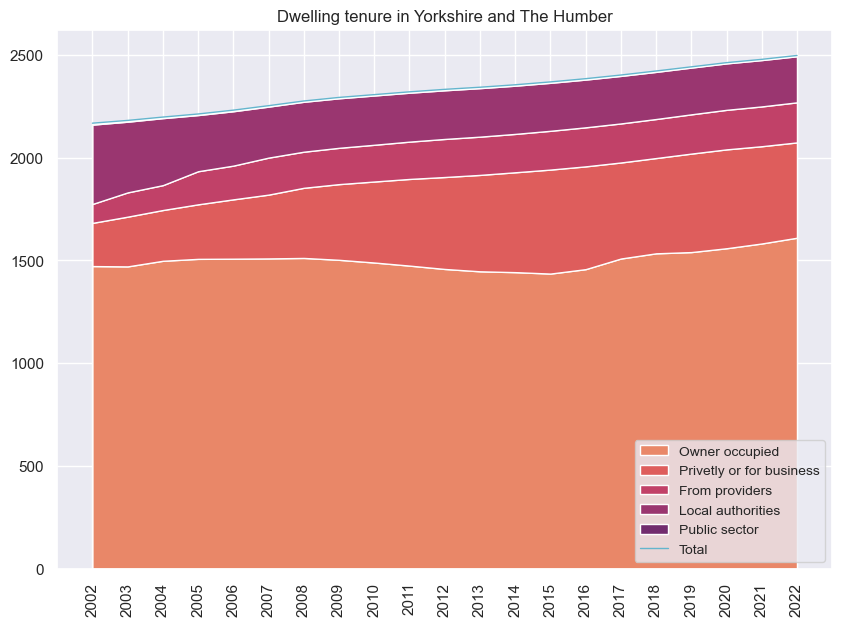

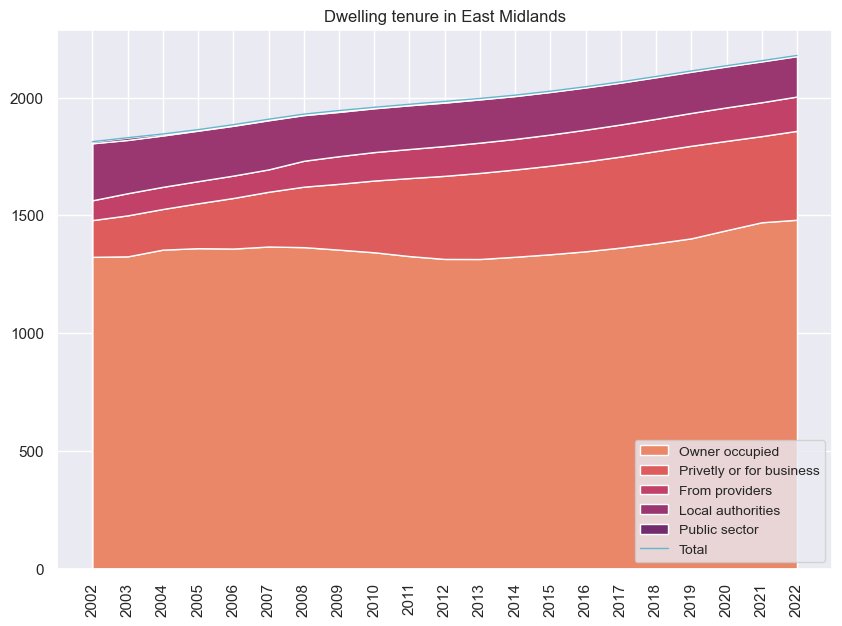

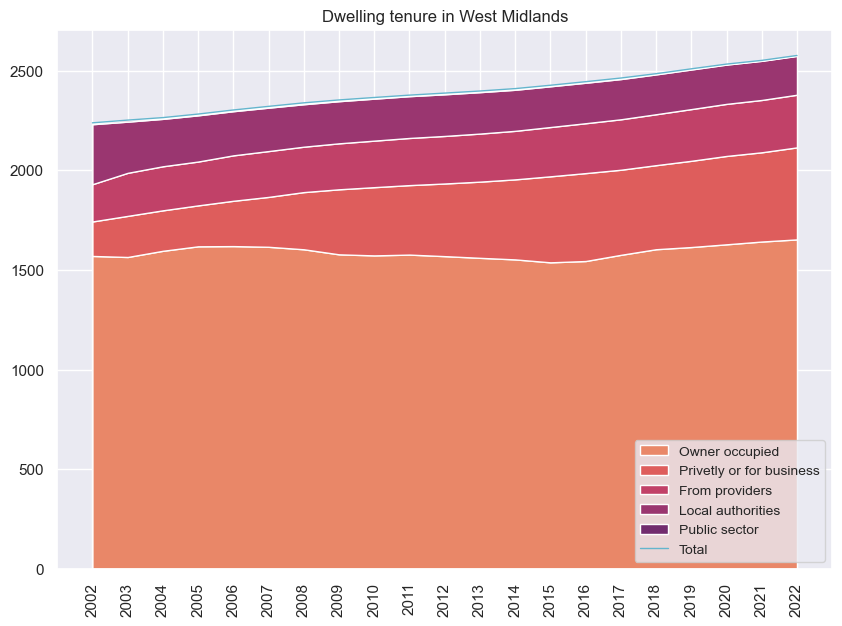

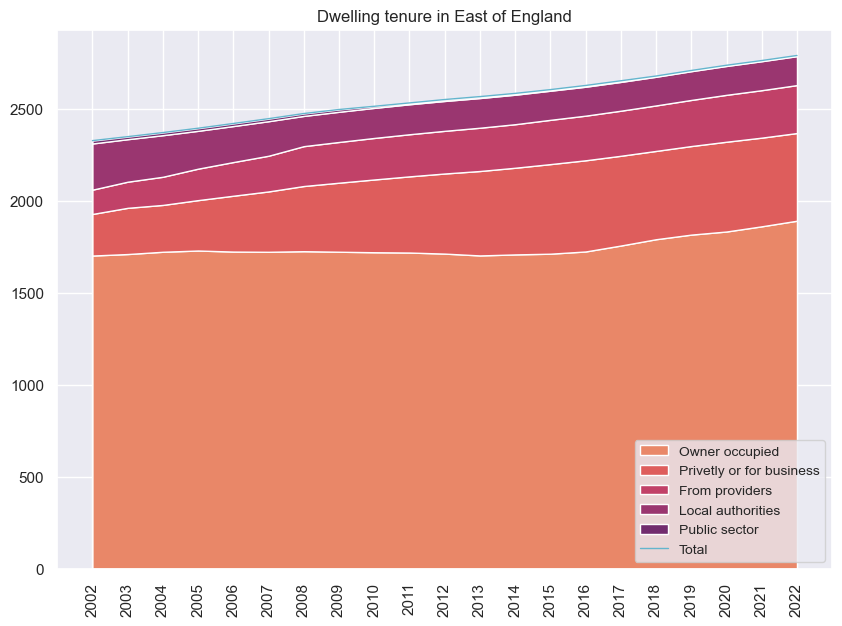

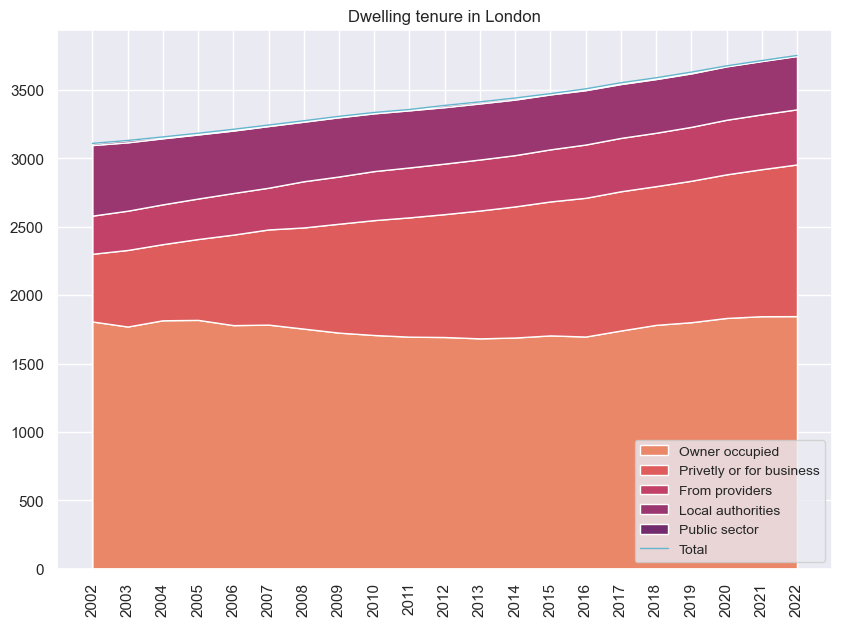

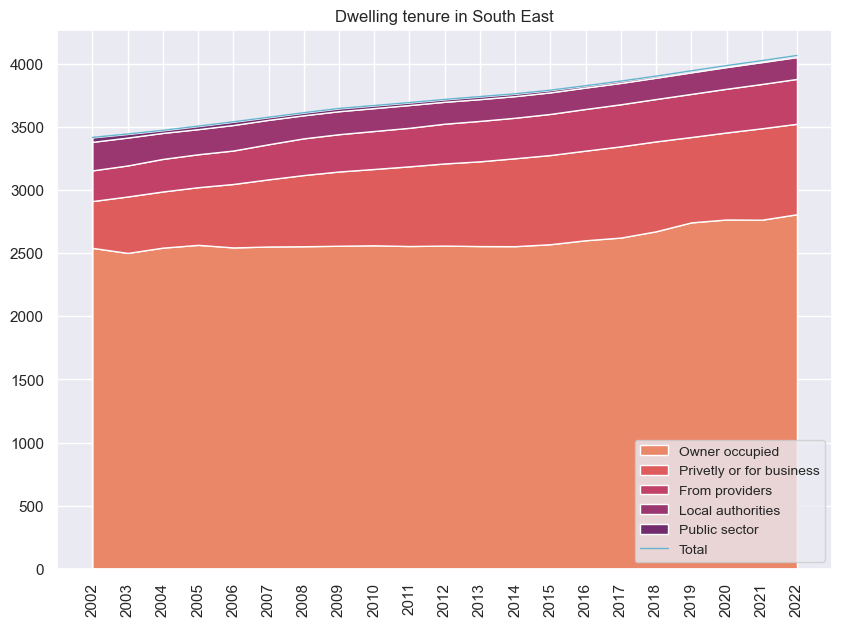

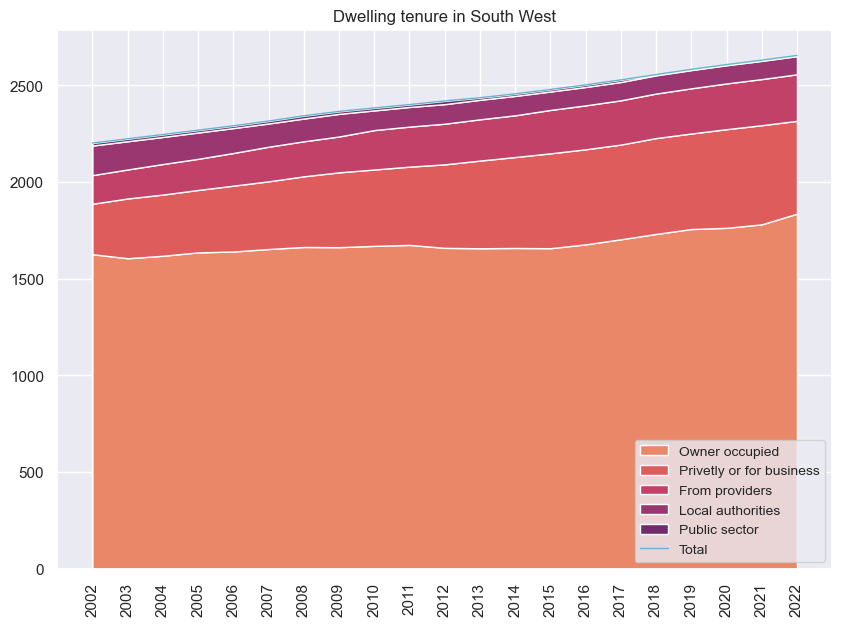

In [223]:
regions = Dwe_tenure.columns.to_list()[1:]
print(regions)
print(len(regions))

begin = 2002
end = 2022

for r in regions: 
    plot_tenure(begin, end, r,"Output/Dwe-Ten-"+r+"-2002-2022.png")

Plotting the evolution of the total population in England between 1971 and 2022. 

In [224]:
file = "Data/GOV UK/Eng-dwelling_by-tenure.ods"
Dwe_global_tenure = pd.read_excel(file).drop(index=[0,1])
Dwe_global_tenure.columns = Dwe_global_tenure.iloc[0]
Dwe_global_tenure.columns.name = None
Dwe_global_tenure = Dwe_global_tenure.drop(index=[2,3,4])
Dwe_global_tenure = Dwe_global_tenure.drop(index=np.arange(90,115))

s = pd.Series(Dwe_global_tenure.columns)
s = s.fillna('NaN' + (s.groupby(s.isnull()).cumcount() + 1).astype(str))
Dwe_global_tenure.columns = s
Dwe_global_tenure = Dwe_global_tenure.rename(columns={"NaN1":"Year","NaN2":"Notes"})
Dwe_global_tenure = Dwe_global_tenure.drop(columns=["Notes"])

Dwe_global_tenure = Dwe_global_tenure.set_index("Year")
Dwe_global_tenure = Dwe_global_tenure[Dwe_global_tenure.index.notnull()]
index_string = Dwe_global_tenure.index.to_list()
index_string = [x for x in index_string if x==str(x)]
print(index_string)
Dwe_global_tenure = Dwe_global_tenure.drop(index=index_string)
print(Dwe_global_tenure.index.to_list())

display(Dwe_global_tenure)

['31 December', '1 April', '31 December', '1 April', '31 December', '31 March']
[1801, 1811, 1821, 1831, 1841, 1851, 1861, 1871, 1881, 1891, 1901, 1911, 1921, 1931, 1941, 1951, 1961, 1969, 1970, 1971, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


,Owner Occupied,Rented Privately or with a job or business,Rented from Private Registered Providers,Rented from Local Authorities,Other public sector dwellings,All Dwellings
Year,,,,,,
1801,..,..,..,..,..,1512
1811,..,..,..,..,..,1714
1821,..,..,..,..,..,2004
1831,..,..,..,..,..,2420
1841,..,..,..,..,..,2890
...,...,...,...,...,...,...
2018,15352.670015,4773.156289,2452.432367,1592.008,43.21,24213.476671
2019,15591.479953,4762.266444,2478.680384,1587.164,41.652,24461.242781
2020,15775.798627,4812.719064,2504.8942,1582.946,33.476,24709.83389


Let's plot all the total dwellings. 

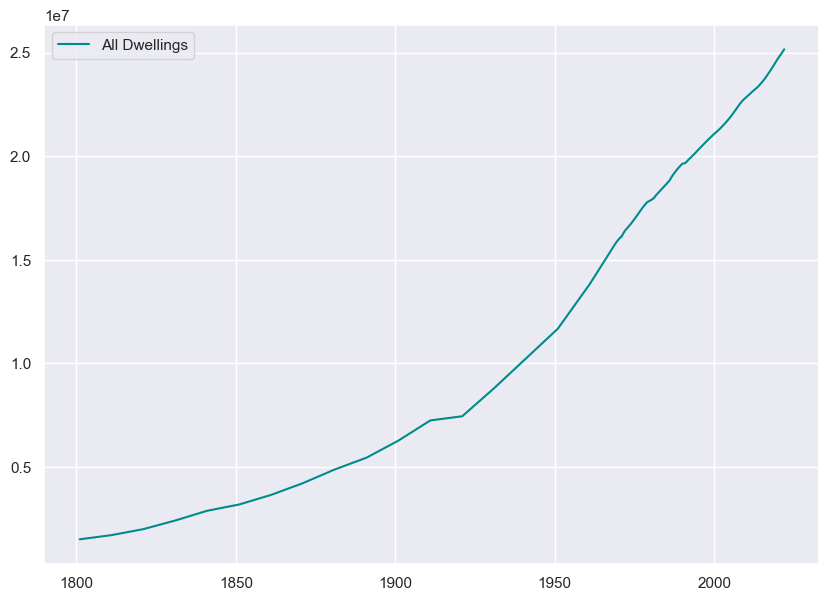

In [225]:
Dwe_global_tenure_all = Dwe_global_tenure["All Dwellings"]*1000 # original unit: thousand of dwellings 

# missing data is in string: we eliminate them 
Dwe_global_tenure_all = Dwe_global_tenure_all[[type(x)!=str for x in Dwe_global_tenure_all.to_list()]]

#display(Dwe_global_tenure_all.index.to_list())

def plot_column(s,png,obj):
    time = s.index.to_list()
    data = s.to_list()
    ax = sns.lineplot(y=data,x=time,label=obj,color='darkcyan',markers="o")
    ax.set(xlabel=None, ylabel=None)
    ax.ticklabel_format(style='scientific', axis='y')
    fig = ax.get_figure()
    fig.savefig(png,dpi=300,bbox_inches="tight")
    plt.show()
    return 

plot_column(Dwe_global_tenure_all, "Output/Dwe-All-Ten-Eng-1801-2022.png","All Dwellings")

[1961, 1969, 1970, 1971, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


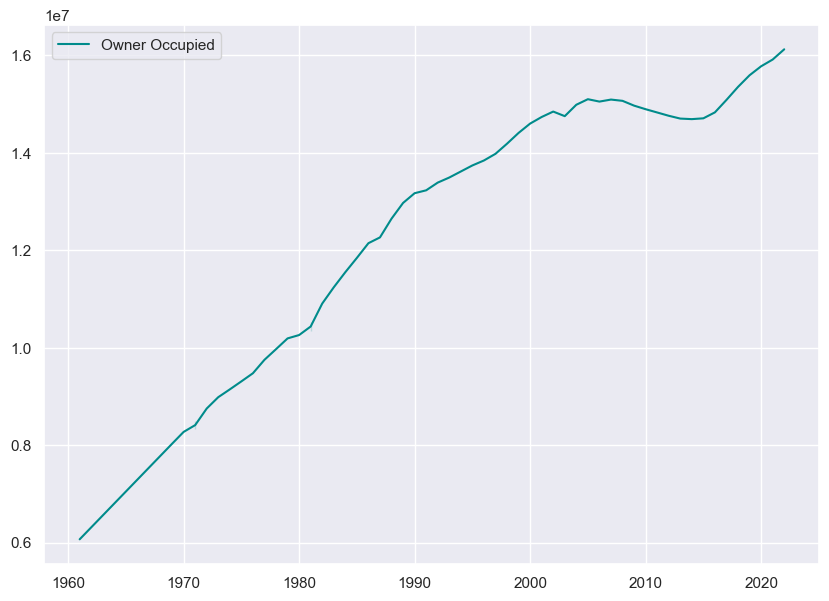

[1961, 1969, 1970, 1971, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


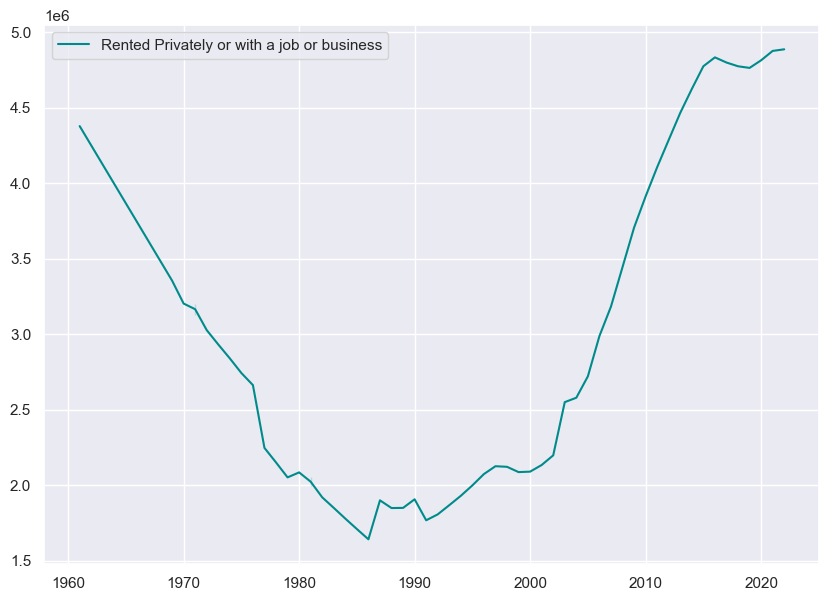

[1977, 1978, 1979, 1980, 1981, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


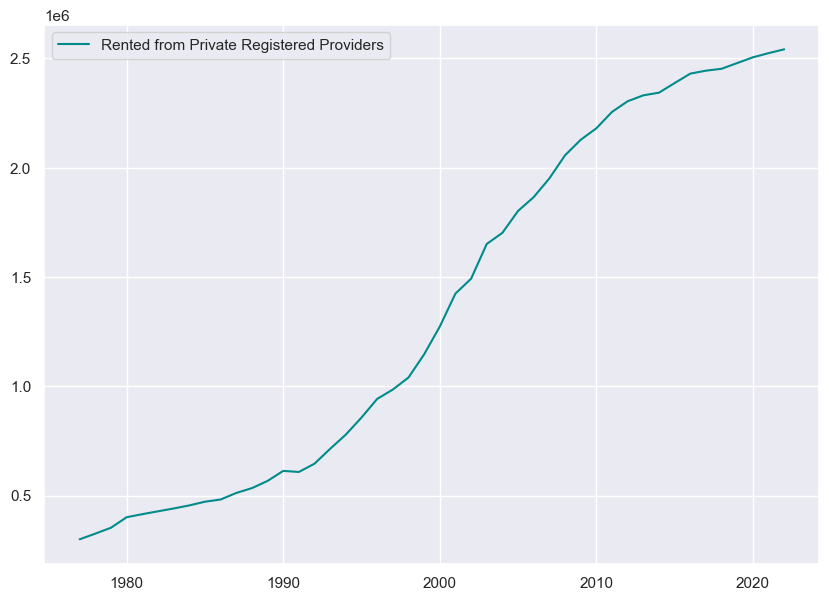

[1961, 1969, 1970, 1971, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


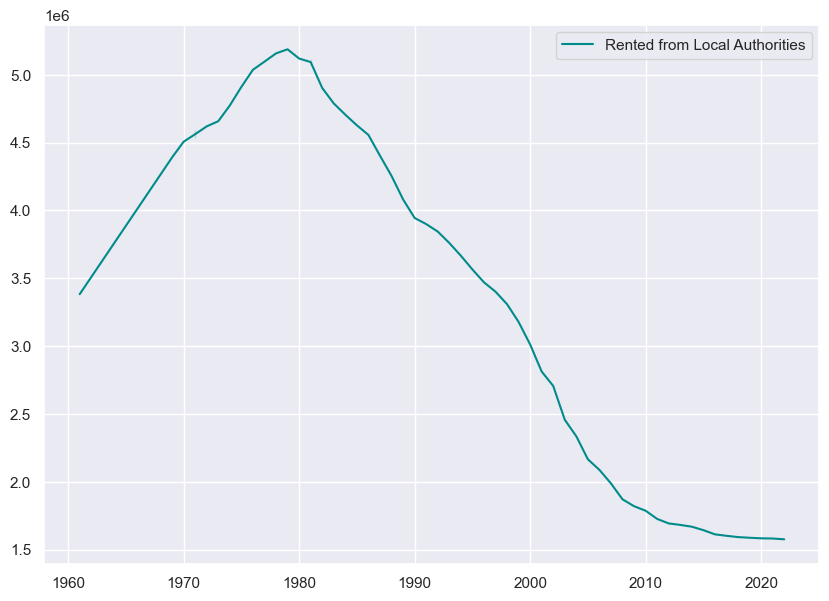

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


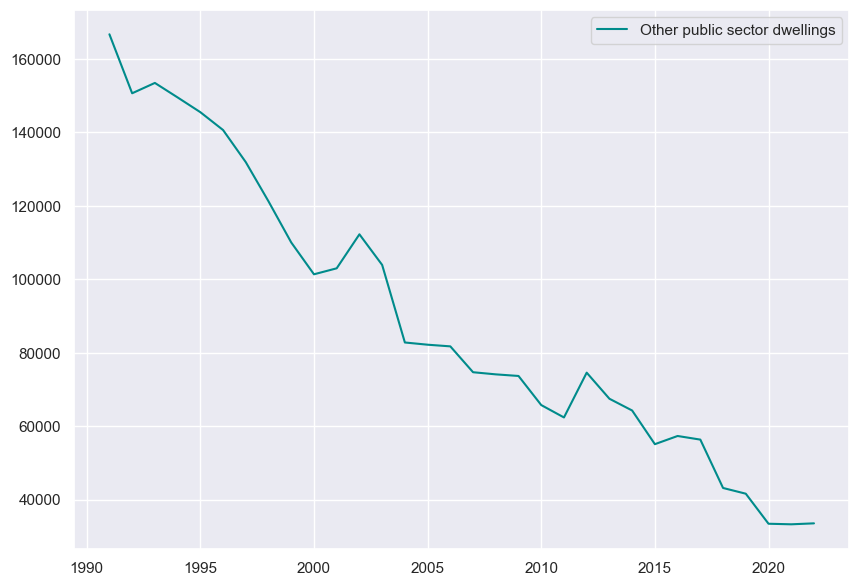

In [226]:
Dwe_global_tenure_owner_occ = Dwe_global_tenure["Owner Occupied"]*1000 # original unit: thousand of dwellings 
Dwe_global_tenure_private_or_bus = Dwe_global_tenure["Rented Privately or with a job or business"]*1000
Dwe_global_tenure_providers = Dwe_global_tenure["Rented from Private Registered Providers"]*1000
Dwe_global_tenure_authorities = Dwe_global_tenure["Rented from Local Authorities"]*1000
Dwe_global_tenure_public = Dwe_global_tenure["Other public sector dwellings"]*1000

Dwe_global_tenure_owner_occ = Dwe_global_tenure_owner_occ[[type(x)!=str for x in Dwe_global_tenure_owner_occ.to_list()]]
Dwe_global_tenure_private_or_bus = Dwe_global_tenure_private_or_bus[[type(x)!=str for x in Dwe_global_tenure_private_or_bus.to_list()]]
Dwe_global_tenure_providers = Dwe_global_tenure_providers[[type(x)!=str for x in Dwe_global_tenure_providers.to_list()]]
Dwe_global_tenure_authorities = Dwe_global_tenure_authorities[[type(x)!=str for x in Dwe_global_tenure_authorities.to_list()]]
Dwe_global_tenure_public = Dwe_global_tenure_public[[type(x)!=str for x in Dwe_global_tenure_public.to_list()]]

print(Dwe_global_tenure_owner_occ.index.to_list())
plot_column(Dwe_global_tenure_owner_occ, "Output/Dwe-Own-Occ-Eng-1961-2022.png","Owner Occupied")
print(Dwe_global_tenure_private_or_bus.index.to_list())
plot_column(Dwe_global_tenure_private_or_bus, "Output/Dwe-Pri-Bus-Eng-1961-2022.png","Rented Privately or with a job or business")
print(Dwe_global_tenure_providers.index.to_list())
plot_column(Dwe_global_tenure_providers, "Output/Dwe-Providers-Eng-1977-2022.png","Rented from Private Registered Providers")
print(Dwe_global_tenure_authorities.index.to_list())
plot_column(Dwe_global_tenure_authorities, "Output/Dwe-Auth-Eng-1961-2022.png","Rented from Local Authorities")
print(Dwe_global_tenure_public.index.to_list())
plot_column(Dwe_global_tenure_public, "Output/Dwe-Public-Eng-1991-2022.png","Other public sector dwellings")

The code below has to be reviewed: we have different x timeframes for the different types of tenures.

In [227]:
"""
Dwe_global_tenure_owner_occ = Dwe_global_tenure["Owner Occupied"]*1000 # original unit: thousand of dwellings 
Dwe_global_tenure_private_or_bus = Dwe_global_tenure["Rented Privately or with a job or business"]*1000
Dwe_global_tenure_providers = Dwe_global_tenure["Rented from Private Registered Providers"]*1000
Dwe_global_tenure_authorities = Dwe_global_tenure["Rented from Local Authorities"]*1000
Dwe_global_tenure_public = Dwe_global_tenure["Other public sector dwellings"]*1000

# missing data is in string: we eliminate them 
Dwe_global_tenure_owner_occ = Dwe_global_tenure_owner_occ[[type(x)!=str for x in Dwe_global_tenure_owner_occ.to_list()]]
Dwe_global_tenure_private_or_bus = Dwe_global_tenure_private_or_bus[[type(x)!=str for x in Dwe_global_tenure_private_or_bus.to_list()]]
Dwe_global_tenure_providers = Dwe_global_tenure_providers[[type(x)!=str for x in Dwe_global_tenure_providers.to_list()]]
Dwe_global_tenure_authorities = Dwe_global_tenure_authorities[[type(x)!=str for x in Dwe_global_tenure_authorities.to_list()]]
Dwe_global_tenure_public = Dwe_global_tenure_public[[type(x)!=str for x in Dwe_global_tenure_public.to_list()]]

#display(Dwe_global_tenure_owner_occ)
#display(Dwe_global_tenure_private_or_bus)
#display(Dwe_global_tenure_providers)
#display(Dwe_global_tenure_authorities)
#display(Dwe_global_tenure_public)

data = [
    Dwe_global_tenure_owner_occ.to_list(),
    Dwe_global_tenure_private_or_bus.to_list(),
    Dwe_global_tenure_providers.to_list(),
    Dwe_global_tenure_authorities.to_list(),
    Dwe_global_tenure_public.to_list()
]

display(Dwe_global_tenure_owner_occ.index.to_list())
display(Dwe_global_tenure_private_or_bus.index.to_list())
display(Dwe_global_tenure_providers.index.to_list())
display(Dwe_global_tenure_authorities.index.to_list())
display(Dwe_global_tenure_public.index.to_list())

#display(data[0])
#display(len(data))

plt.stackplot(Dwe_global_tenure_owner_occ.index.to_list(),[Dwe_global_tenure_owner_occ.to_list(),Dwe_global_tenure_private_or_bus.to_list(),Dwe_global_tenure_providers.to_list()], labels=['test','test2','t'], colors=sns.color_palette("flare", 3))
plt.show()

def plot_eng_tenure(time,data,png):
    cols = sns.color_palette("flare", len(data))
    la = ['Owner occupied','Privetly or for business','From providers','Local authorities','Public sector']
    plt.stackplot(time,data, labels=la, colors=cols)
    plt.xticks(time, rotation=90)
    plt.legend(loc='lower right',fontsize='small')
    plt.title("Dwelling tenure in England")
    plt.savefig(png,dpi=300,bbox_inches="tight")
    plt.show()
    return 

time = Dwe_global_tenure_owner_occ.index.to_list()

plot_eng_tenure(time,Dwe_global_tenure_owner_occ, "Output/Dwe-by-tenure-Eng-1961-2022.png")
"""


'\nDwe_global_tenure_owner_occ = Dwe_global_tenure["Owner Occupied"]*1000 # original unit: thousand of dwellings \nDwe_global_tenure_private_or_bus = Dwe_global_tenure["Rented Privately or with a job or business"]*1000\nDwe_global_tenure_providers = Dwe_global_tenure["Rented from Private Registered Providers"]*1000\nDwe_global_tenure_authorities = Dwe_global_tenure["Rented from Local Authorities"]*1000\nDwe_global_tenure_public = Dwe_global_tenure["Other public sector dwellings"]*1000\n\n# missing data is in string: we eliminate them \nDwe_global_tenure_owner_occ = Dwe_global_tenure_owner_occ[[type(x)!=str for x in Dwe_global_tenure_owner_occ.to_list()]]\nDwe_global_tenure_private_or_bus = Dwe_global_tenure_private_or_bus[[type(x)!=str for x in Dwe_global_tenure_private_or_bus.to_list()]]\nDwe_global_tenure_providers = Dwe_global_tenure_providers[[type(x)!=str for x in Dwe_global_tenure_providers.to_list()]]\nDwe_global_tenure_authorities = Dwe_global_tenure_authorities[[type(x)!=str f

## Vacancy

In [228]:
file = "Data/GOV UK/Eng_vacancy.ods"
sheet1 = 'England_Data'
sheet2 = 'All_Vacants'
Dwe_van_eng = pd.read_excel(file,sheet_name=sheet1).drop(index=[0])
Dwe_van_reg = pd.read_excel(file,sheet_name=sheet2).drop(index=[0],columns=['Unnamed: 1']).T

Dwe_van_eng.columns = Dwe_van_eng.iloc[0]
Dwe_van_eng.columns.name = None
Dwe_van_eng = Dwe_van_eng.drop(index=[1])
Dwe_van_eng['Vacants Available for Letting'] = Dwe_van_eng['Vacants Available for Letting'].replace('[z]',0)
Dwe_van_eng = Dwe_van_eng.set_index('Year')

Dwe_van_reg.columns = Dwe_van_reg.iloc[1]
Dwe_van_reg.columns.name = None
#display(Dwe_van_reg.loc['Unnamed: 3':'Unnamed: 46','Region'].astype(int))
Dwe_van_reg.loc['Unnamed: 3':'Unnamed: 46','Region'] = Dwe_van_reg.loc['Unnamed: 3':'Unnamed: 46','Region'].astype(int)
Dwe_van_reg = Dwe_van_reg.set_index('Region')
Dwe_van_reg = Dwe_van_reg.drop(index=['Region'],columns=['[z]'])

display(Dwe_van_reg)
display(Dwe_van_eng)


,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Region,,,,,,,,,
Area_Code,E12000004,E12000006,E12000007,E12000001,E12000002,E12000008,E12000009,E12000005,E12000003
1980,7341.0,5384.0,33182.0,7952.0,17009.0,5608.0,2552.0,11896.0,9469.0
1981,5993.0,4411.0,32970.0,7925.0,15183.0,5309.0,2127.0,9910.0,7894.0
1982,6177.0,4409.0,32720.0,9476.0,16255.0,5088.0,2350.0,11894.0,9273.0
1983,7611.0,5188.0,31328.0,9957.0,17749.0,6061.0,3014.0,12343.0,12584.0
1984,7780.0,5156.0,29726.0,9784.0,18762.0,6273.0,3046.0,11752.0,10956.0
1985,6899.0,5857.0,29501.0,9997.0,20146.0,6946.0,3049.0,13193.0,11778.0
1986,6478.0,5355.0,27751.0,10569.0,25406.0,7270.0,3235.0,13716.0,11800.0
1987,6865.0,5183.0,26365.0,11050.0,23734.0,7262.0,3204.0,13619.0,11351.0


,Vacants,Vacants Available for Letting
Year,,
1980,100393,0
1981,91722,0
1982,97642,0
1983,105835,0
1984,103235,0
1985,107366,0
1986,111580,30303
1987,108633,53383
1988,101223,50717


Plotting the above data. 

,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Region,,,,,,,,,
1980,7341.0,5384.0,33182.0,7952.0,17009.0,5608.0,2552.0,11896.0,9469.0
1981,5993.0,4411.0,32970.0,7925.0,15183.0,5309.0,2127.0,9910.0,7894.0
1982,6177.0,4409.0,32720.0,9476.0,16255.0,5088.0,2350.0,11894.0,9273.0
1983,7611.0,5188.0,31328.0,9957.0,17749.0,6061.0,3014.0,12343.0,12584.0
1984,7780.0,5156.0,29726.0,9784.0,18762.0,6273.0,3046.0,11752.0,10956.0
1985,6899.0,5857.0,29501.0,9997.0,20146.0,6946.0,3049.0,13193.0,11778.0
1986,6478.0,5355.0,27751.0,10569.0,25406.0,7270.0,3235.0,13716.0,11800.0
1987,6865.0,5183.0,26365.0,11050.0,23734.0,7262.0,3204.0,13619.0,11351.0
1988,6291.0,4831.0,23211.0,10402.0,22667.0,6227.0,2927.0,13014.0,11653.0


9


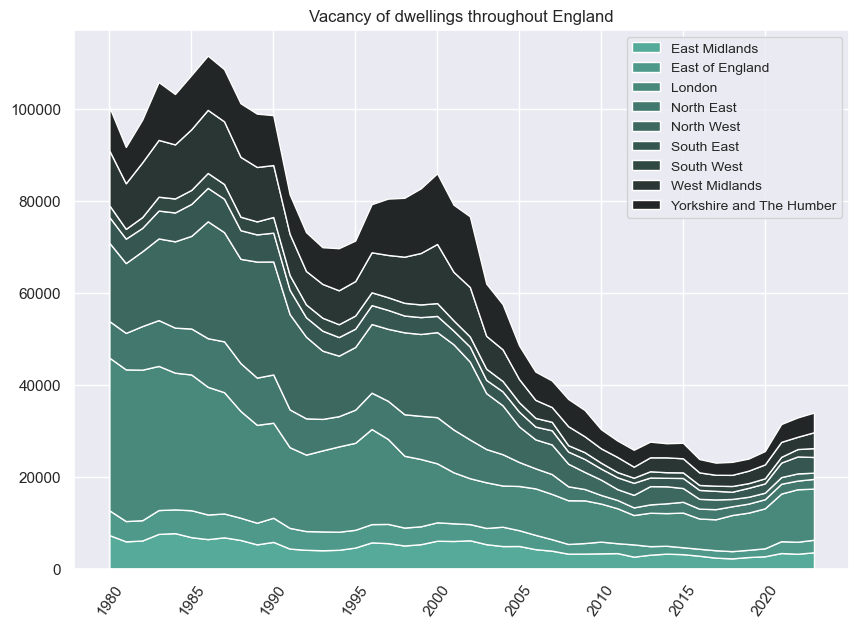

In [229]:
Dwe_van_reg = Dwe_van_reg.loc[1980:,:]

display(Dwe_van_reg)

begin = 1980 
end  = 2023 
n = len(Dwe_van_reg.columns)
png = "Output/Dwe-vac-by-reg.png"
title = "Vacancy of dwellings throughout England"
print(n)

time = np.arange(begin,end+1)
y_vacant = [Dwe_van_reg[region].to_list() for region in Dwe_van_reg.columns]
cols = sns.color_palette("dark:#5A9_r", as_cmap=True)
cols = sns.color_palette("dark:#5A9_r", n)
plt.stackplot(time,y_vacant, labels=Dwe_van_reg.columns, colors=cols)
plt.xticks(np.arange(begin,end+1,5), rotation=55)
plt.legend(loc='upper right',fontsize='small')
plt.title(title)
plt.savefig(png,dpi=300,bbox_inches="tight")
plt.show()

,Vacants,Vacants Available for Letting
Year,,
1980,100393,0
1981,91722,0
1982,97642,0
1983,105835,0
1984,103235,0
1985,107366,0
1986,111580,30303
1987,108633,53383
1988,101223,50717


2


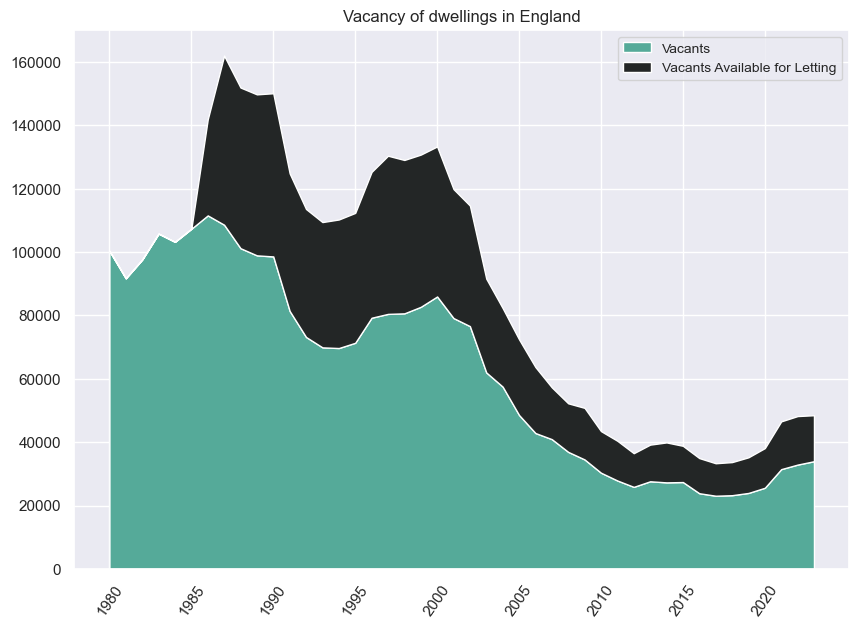

In [230]:
display(Dwe_van_eng)

begin = 1980 
end  = 2023 
n = len(Dwe_van_eng.columns)
png = "Output/Dwe-vac-eng.png"
print(n)

time = np.arange(begin,end+1)
y_vacant = [Dwe_van_eng[region].to_list() for region in Dwe_van_eng.columns]
cols = sns.color_palette("dark:#5A9_r", as_cmap=True)
cols = sns.color_palette("dark:#5A9_r", n)
plt.stackplot(time,y_vacant, labels=Dwe_van_eng.columns, colors=cols)
plt.xticks(np.arange(begin,end+1,5), rotation=55)
plt.legend(loc='upper right',fontsize='small')
plt.title("Vacancy of dwellings in England")
plt.savefig(png,dpi=300,bbox_inches="tight")
plt.show()

## Next ? 

In [231]:
# unit : dwellings per hectar 

file = "Data/GOV UK/Eng_dew-stock-density_by-district.ods"
Dwe_density = pd.read_excel(file).drop(index=[0]).drop(index=np.arange(485,508)).T

Dwe_density.loc['Unnamed: 5':'Unnamed: 16',1] = Dwe_density.loc['Unnamed: 5':'Unnamed: 16',1].astype(int)
Dwe_density.loc['Table 126: Dwelling stock density estimates by local authority district: 31 March 2011 - 31 March 2022':'Unnamed: 4',1] = ['region','reg2','reg3']

Dwe_density = Dwe_density.set_index(1)
Dwe_density = Dwe_density.dropna(axis=1, how='all') # dropping all columns filled with NaNs
n = len(Dwe_density.columns)

region_level1 = [x for x in Dwe_density.loc['region',:].to_list() if type(x)==str]
#print(region_level1)
# first region being england, then the big regions
list_regions = region_level1[1:]
region_level2 = [x for x in Dwe_density.loc['reg2',:].to_list() if type(x)==str]
#print(region_level2)
region_level3 = [x for x in Dwe_density.loc['reg3',:].to_list() if type(x)==str]
#print(region_level3)

for i in np.arange(n):
    if type(Dwe_density.iloc[3,i])==str:
        Dwe_density.iloc[2,i] = Dwe_density.iloc[3,i]
        Dwe_density.iloc[3,i] = 0
    if type(Dwe_density.iloc[4,i])==str:
        Dwe_density.iloc[2,i] = Dwe_density.iloc[4,i]
        Dwe_density.iloc[4,i] = 0
Dwe_density.columns = Dwe_density.loc['region']
Dwe_density = Dwe_density.drop(index=['region','reg2','reg3'])

Dwe_density.columns.name = None
Dwe_density.index.name = None

print(Dwe_density.columns.to_list())
display(Dwe_density)

['ENGLAND', 'NORTH EAST', 'Darlington UA', 'Hartlepool UA', 'Middlesbrough UA', 'Redcar and Cleveland UA', 'Stockton-on-Tees UA', 'County Durham UA', 'Northumberland UA', 'Durham', 'Chester-le-Street', 'Derwentside', 'Durham', 'Easington', 'Sedgefield', 'Teesdale', 'Wear Valley', 'Northumberland', 'Alnwick', 'Berwick-upon-Tweed', 'Blyth Valley', 'Castle Morpeth', 'Tynedale', 'Wansbeck', 'Tyne and Wear (Met County)', 'Gateshead', 'Newcastle upon Tyne', 'North Tyneside', 'South Tyneside', 'Sunderland', 'NORTH WEST', 'Blackburn with Darwen UA', 'Blackpool UA', 'Halton UA', 'Warrington UA', 'Cheshire East UA', 'Cheshire West and Chester UA', 'Cheshire', 'Chester', 'Congleton', 'Crewe and Nantwich', 'Ellesmere Port and Neston', 'Macclesfield', 'Vale Royal', 'Cumbria', 'Allerdale', 'Barrow-in-Furness', 'Carlisle', 'Copeland', 'Eden', 'South Lakeland', 'Greater Manchester (Met County)', 'Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside', 'Trafford', 'Wiga

,ENGLAND,NORTH EAST,Darlington UA,Hartlepool UA,Middlesbrough UA,Redcar and Cleveland UA,Stockton-on-Tees UA,County Durham UA,Northumberland UA,Durham,...,Sedgemoor,South Somerset,Taunton Deane,West Somerset,Somerset West and Taunton,Wiltshire,Kennet,North Wiltshire,Salisbury,West Wiltshire
Old ONS code,NaN,NaN,00EH,00EB,00EC,00EE,00EF,00EJ,00EM,NaN,...,40UC,40UD,40UE,40UF,A0013,NaN,46UB,46UC,46UD,46UF
New ONS code,E92000001,E12000001,E06000005,E06000001,E06000002,E06000003,E06000004,E06000047,E06000057,E10000010,...,E07000188,E07000189,E07000190,E07000191,E07000246,E10000033,E07000230,E07000231,E07000232,E07000233
2011,1.763609,1.374374,2.463301,4.485365,11.127074,2.527654,4.033282,1.04887,0.295248,NaN,...,0.901532,0.765088,1.064522,0.242243,NaN,NaN,NaN,NaN,NaN,NaN
2012,1.774411,1.37897,2.47232,4.505607,11.144352,2.540309,4.054901,1.055354,0.296198,NaN,...,0.915533,0.770083,1.076491,0.243792,NaN,NaN,NaN,NaN,NaN,NaN
2013,1.784191,1.383063,2.47906,4.514023,11.191324,2.54349,4.085034,1.061245,0.297235,NaN,...,0.92755,0.774818,1.087465,0.244778,NaN,NaN,NaN,NaN,NaN,NaN
2014,1.794996,1.387126,2.491421,4.519243,11.21714,2.553735,4.101103,1.065519,0.298187,NaN,...,0.936715,0.78044,1.101099,0.246248,NaN,NaN,NaN,NaN,NaN,NaN
2015,1.808533,1.395073,2.515216,4.569688,11.335686,2.574451,4.101254,1.071065,0.30091,NaN,...,0.947899,0.788532,1.119297,0.248697,NaN,NaN,NaN,NaN,NaN,NaN
2016,1.823538,1.403438,2.529197,4.622374,11.432938,2.584291,4.118239,1.078681,0.302724,NaN,...,0.957471,0.794915,1.139765,0.250374,NaN,NaN,NaN,NaN,NaN,NaN
2017,1.840634,1.414905,2.536139,4.639187,11.526254,2.606296,4.162498,1.085713,0.305607,NaN,...,0.967669,0.80138,1.161682,0.252486,NaN,NaN,NaN,NaN,NaN,NaN
2018,1.858144,1.425567,2.562122,4.66377,11.595675,2.624469,4.199292,1.092481,0.308189,NaN,...,0.976426,0.807221,1.181783,0.254218,NaN,NaN,NaN,NaN,NaN,NaN


Let's plot. 

2011    1.763609
2012    1.774411
2013    1.784191
2014    1.794996
2015    1.808533
2016    1.823538
2017    1.840634
2018    1.858144
2019    1.877166
2020    1.896216
2021    1.912938
2022    1.966479
Name: ENGLAND, dtype: object

,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST
2011,1.374374,2.228876,1.505689,1.263267,1.82849,1.325012,21.360361,1.937305,1.007363
2012,1.37897,2.236395,1.513515,1.271231,1.836343,1.334666,21.549211,1.950313,1.01515
2013,1.383063,2.245397,1.520432,1.278368,1.844413,1.342327,21.713606,1.962114,1.022215
2014,1.387126,2.254786,1.528168,1.286742,1.853681,1.351447,21.894158,1.973442,1.030556
2015,1.395073,2.267826,1.537214,1.297531,1.866601,1.362169,22.095353,1.988455,1.04015
2016,1.403438,2.281551,1.547423,1.309626,1.880349,1.373935,22.319226,2.006867,1.05009
2017,1.414905,2.298244,1.558957,1.322886,1.89451,1.387285,22.601504,2.026107,1.060925
2018,1.425567,2.316567,1.571693,1.337412,1.91122,1.40076,22.833854,2.046848,1.072375
2019,1.436552,2.337588,1.58485,1.352454,1.930043,1.41655,23.097349,2.068847,1.083702
2020,1.446212,2.360975,1.598098,1.366523,1.948277,1.431617,23.389513,2.090619,1.094142


9


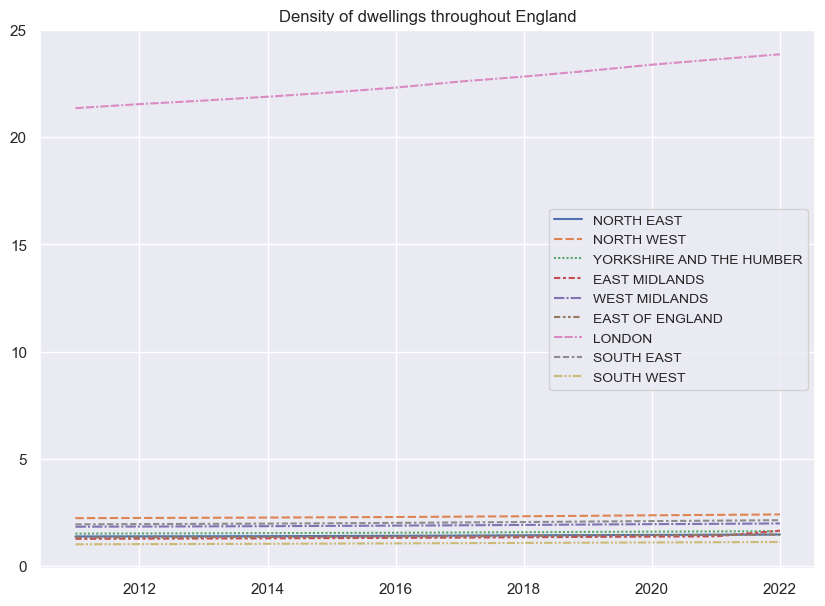

In [234]:
Eng_density = Dwe_density['ENGLAND'].drop(index=['Old ONS code','New ONS code'])
Reg_density = Dwe_density[list_regions].drop(index=['Old ONS code','New ONS code'])

display(Eng_density)
display(Reg_density)

begin = 2011 
end  = 2022
n = len(Reg_density.columns)
png = "Output/Dwe-density-by-reg.png"
title = "Density of dwellings throughout England"
print(n)

sns.set_theme(rc={'figure.figsize':(10,7)})

time = np.arange(begin,end+1)
y_vacant = [Reg_density[region].to_list() for region in Reg_density.columns]
cols = sns.color_palette("YlOrRd", n)
den = sns.lineplot(data=Reg_density)
#plt.stackplot(time,y_vacant, labels=Reg_density.columns, colors=cols)
#plt.xticks(time, rotation=55)
plt.legend(loc='center right',fontsize='small')
plt.title(title)
plt.savefig(png,dpi=300,bbox_inches="tight")
plt.show()